## Bonertz, Brian
## DSC680
## Project 1

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

covid = pd.read_csv('WHO COVID-19 cases.csv')
print(covid.shape)
covid.head()

(58560, 9)


,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,1/5/2020,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,1/12/2020,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,1/19/2020,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,1/26/2020,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2/2/2020,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0


In [3]:
#Determine the data type of the columns in the dataset
covid.dtypes

Date_reported         object
Country_code          object
Country               object
Continent             object
WHO_region            object
New_cases            float64
Cumulative_cases       int64
New_deaths           float64
Cumulative_deaths      int64
dtype: object

In [4]:
# This dataset is very large and somewhat complex with the vast number of countries separating the data. 
# Therefore, we will drop the country_code and country columns and explore data from there.
covid.drop(['Country_code', 'Country'], axis=1, inplace=True)
covid.head()

,Date_reported,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,1/5/2020,Asia,EMRO,NaN,0,NaN,0
1,1/12/2020,Asia,EMRO,NaN,0,NaN,0
2,1/19/2020,Asia,EMRO,NaN,0,NaN,0
3,1/26/2020,Asia,EMRO,NaN,0,NaN,0
4,2/2/2020,Asia,EMRO,NaN,0,NaN,0


In [5]:
# Next we will aggregate the rows of data by date. 
# Ensure Date_reported is in datetime format
covid['Date_reported'] = pd.to_datetime(covid['Date_reported'])

covid_continent = covid.drop('WHO_region', axis=1)

# Group by both 'Date_reported' and 'WHO_region', and aggregate the sums
covid_agg_continent = covid_continent.groupby(['Date_reported', 'Continent']).agg({
    'New_cases': 'sum',
    'Cumulative_cases': 'sum',
    'New_deaths': 'sum',
    'Cumulative_deaths': 'sum'
}).reset_index()

covid_agg_continent.head(10)

,Date_reported,Continent,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,Africa,0.0,0,0.0,0
1,2020-01-05,Asia,1.0,1,0.0,0
2,2020-01-05,Europe,1.0,1,3.0,3
3,2020-01-05,North America,0.0,0,0.0,0
4,2020-01-05,Oceania,0.0,0,0.0,0
5,2020-01-05,South America,0.0,0,0.0,0
6,2020-01-05,Uncategorized,0.0,0,0.0,0
7,2020-01-05,island,0.0,0,0.0,0
8,2020-01-12,Africa,0.0,0,0.0,0
9,2020-01-12,Asia,44.0,45,1.0,1


       Continent  Cumulative_deaths
0         Africa             259232
1           Asia            2040550
2         Europe            1698954
3  North America            1675773
4        Oceania              32902
5  South America            1353792
6  Uncategorized                 13
7         island                117


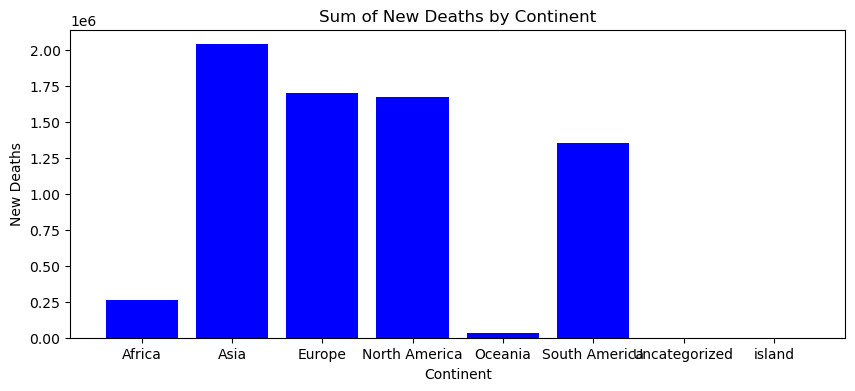

In [6]:
max_deaths_by_continent = covid_agg_continent.groupby('Continent')['Cumulative_deaths'].max().reset_index()
print(max_deaths_by_continent)

# Plot the sum of new deaths by region
plt.figure(figsize=(10, 4))
plt.bar(max_deaths_by_continent['Continent'], max_deaths_by_continent['Cumulative_deaths'], color='blue')
plt.title('Sum of New Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('New Deaths')
plt.show()

In [7]:
covid_clean = covid_agg_continent[~covid_agg_continent['Continent'].isin(['Uncategorized', 'island'])]
covid_clean.head()

covid_clean['Continent'].value_counts()

Africa           244
Asia             244
Europe           244
North America    244
Oceania          244
South America    244
Name: Continent, dtype: int64

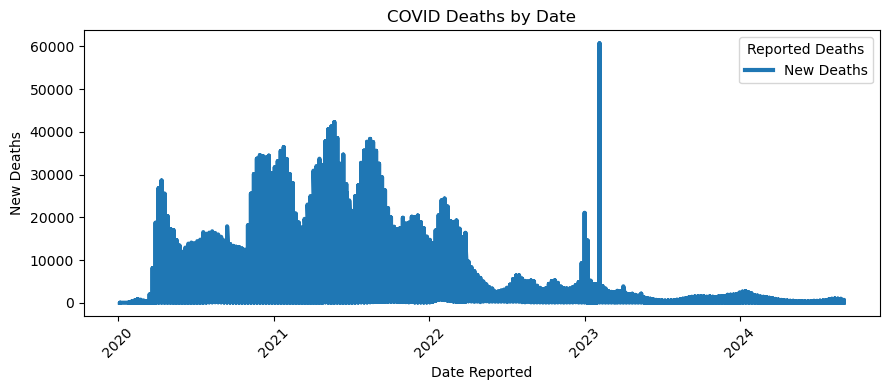

In [19]:
# Plotting the cumulative deaths over time
plt.figure(figsize=(9, 4))

# Plotting line for Cumulative_deaths
plt.plot(covid_clean['Date_reported'], covid_clean['New_deaths'], linewidth=3, label='New Deaths')

# Adding title and labels
plt.title('COVID Deaths by Date')
plt.xlabel('Date Reported')
plt.ylabel('New Deaths')

# Add legend
# If you want the legend to display WHO_region or something similar
# You can use unique values or group data by region for more complex legends
plt.legend(title='Reported Deaths')

# Show the plot
plt.xticks(rotation=45)  # Rotate date labels for better visibility if needed
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

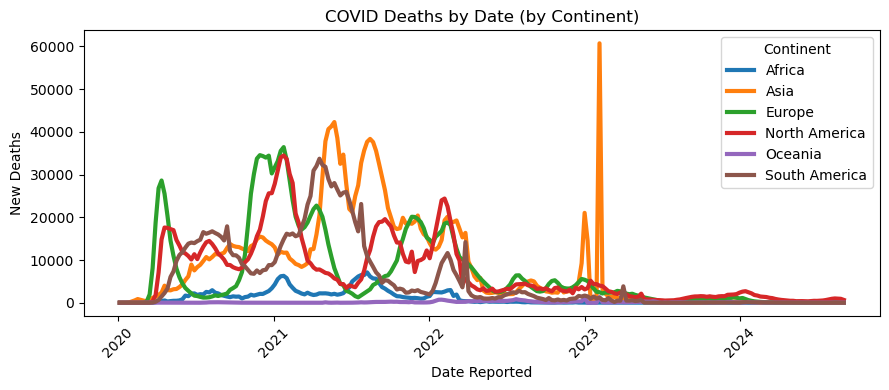

In [20]:
# Group data by Continent and plot each continent separately
continents = covid_clean['Continent'].unique()
plt.figure(figsize=(9, 4))

for continent in continents:
    continent_data = covid_clean[covid_clean['Continent'] == continent]
    plt.plot(continent_data['Date_reported'], continent_data['New_deaths'], label=continent, linewidth=3, fillstyle='none')

# Adding title and labels
plt.title('COVID Deaths by Date (by Continent)')
plt.xlabel('Date Reported')
plt.ylabel('New Deaths')

# Adding legend
plt.legend(title='Continent')

# Show the plot with proper x-ticks formatting
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()       # Adjust layout to fit everything
plt.show()

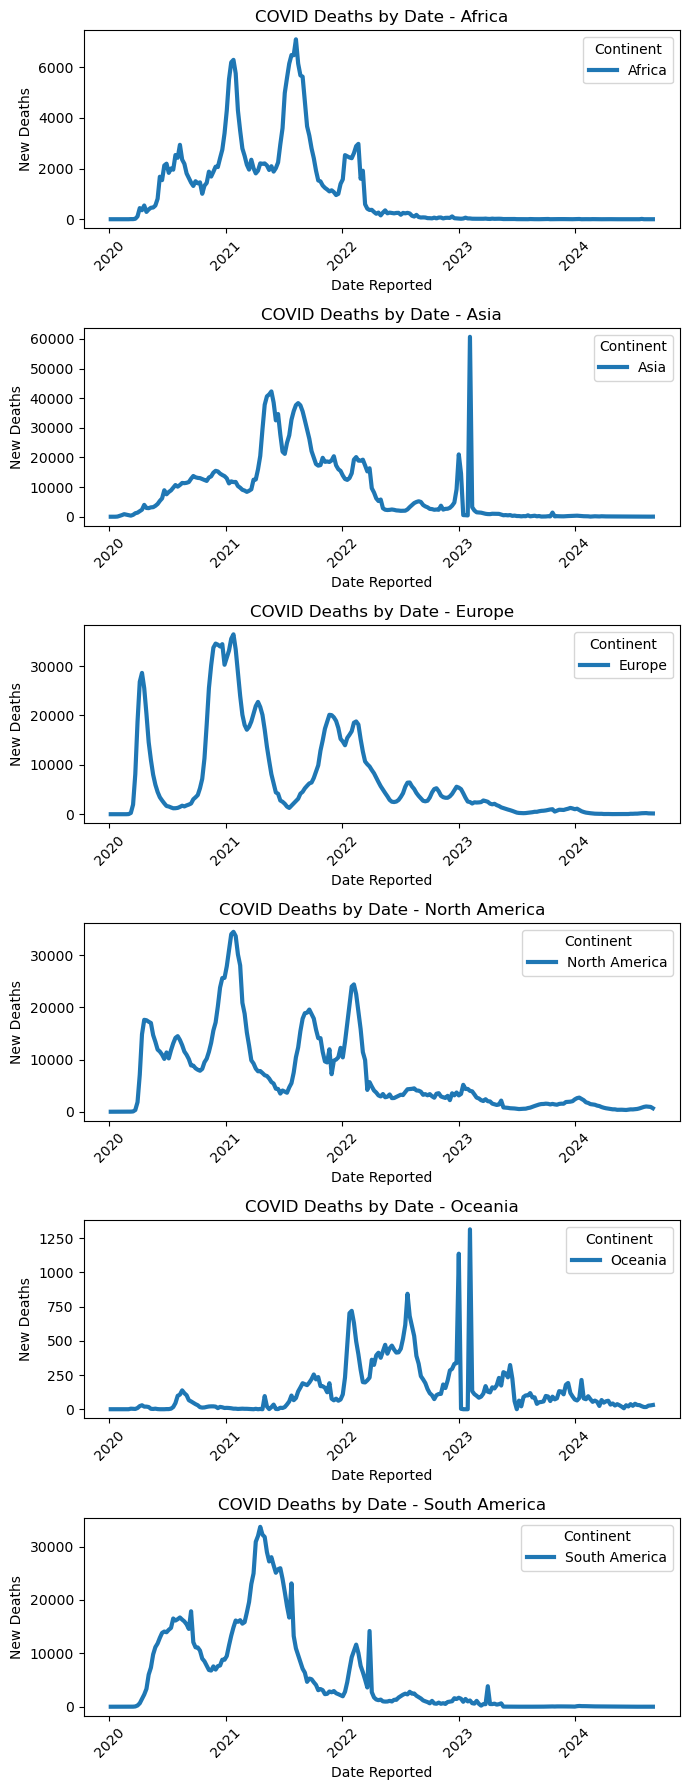

In [12]:

# Set up subplots: one plot for each continent
fig, axes = plt.subplots(len(continents), 1, figsize=(7, 3 * len(continents)))

# Ensure axes is always iterable (even for a single plot)
if len(continents) == 1:
    axes = [axes]

# Loop through each continent and plot in corresponding subplot
for i, continent in enumerate(continents):
    continent_data = covid_clean[covid_clean['Continent'] == continent]
    axes[i].plot(continent_data['Date_reported'], continent_data['New_deaths'], label=continent, linewidth=3)
    axes[i].set_title(f'COVID Deaths by Date - {continent}')
    axes[i].set_xlabel('Date Reported')
    axes[i].set_ylabel('New Deaths')
    axes[i].legend(title='Continent')

# Rotate date labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# REGION
# Next we will aggregate the rows of data by date. 
# Ensure Date_reported is in datetime format
covid['Date_reported'] = pd.to_datetime(covid['Date_reported'])

covid_region = covid.drop('Continent', axis=1)

# Group by both 'Date_reported' and 'WHO_region', and aggregate the sums
covid_agg_region = covid_region.groupby(['Date_reported', 'WHO_region']).agg({
    'New_cases': 'sum',
    'Cumulative_cases': 'sum',
    'New_deaths': 'sum',
    'Cumulative_deaths': 'sum'
}).reset_index()

covid_agg_region.head(10)

,Date_reported,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AFRO,0.0,0,0.0,0
1,2020-01-05,AMRO,0.0,0,0.0,0
2,2020-01-05,EMRO,0.0,0,0.0,0
3,2020-01-05,EURO,1.0,1,3.0,3
4,2020-01-05,OTHER,0.0,0,0.0,0
5,2020-01-05,SEARO,0.0,0,0.0,0
6,2020-01-05,WPRO,1.0,1,0.0,0
7,2020-01-12,AFRO,0.0,0,0.0,0
8,2020-01-12,AMRO,0.0,0,0.0,0
9,2020-01-12,EMRO,0.0,0,0.0,0


  WHO_region  Cumulative_deaths
0       AFRO             174420
1       AMRO            3026953
2       EMRO             351975
3       EURO            2273415
4      OTHER                 13
5      SEARO             808822
6       WPRO             421459


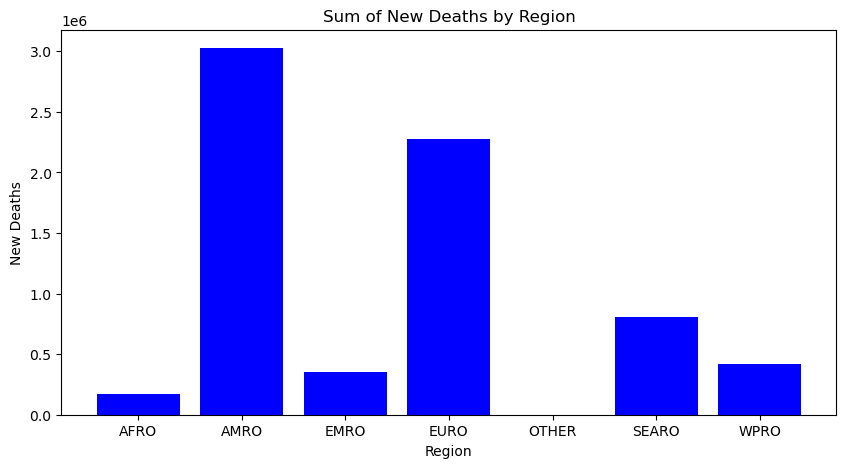

In [14]:
max_deaths_by_region = covid_agg_region.groupby('WHO_region')['Cumulative_deaths'].max().reset_index()
print(max_deaths_by_region)

# Plot the sum of new deaths by region
plt.figure(figsize=(10, 5))
plt.bar(max_deaths_by_region['WHO_region'], max_deaths_by_region['Cumulative_deaths'], color='blue')
plt.title('Sum of New Deaths by Region')
plt.xlabel('Region')
plt.ylabel('New Deaths')
plt.show()

In [15]:
covid_clean2 = covid_agg_region
covid_clean2.head()

covid_clean2['WHO_region'].value_counts()

AFRO     244
AMRO     244
EMRO     244
EURO     244
OTHER    244
SEARO    244
WPRO     244
Name: WHO_region, dtype: int64

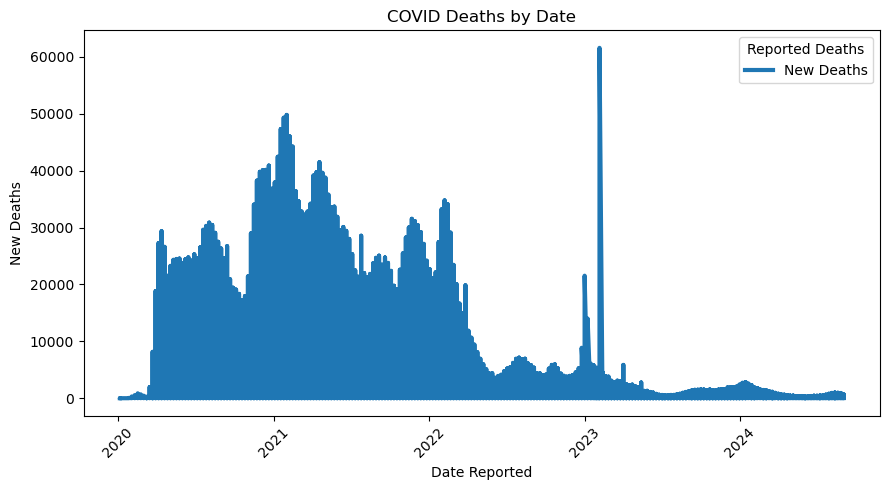

In [16]:
# Plotting the cumulative deaths over time
plt.figure(figsize=(9, 5))

# Plotting line for Cumulative_deaths
plt.plot(covid_clean2['Date_reported'], covid_clean2['New_deaths'], linewidth=3, label='New Deaths')

# Adding title and labels
plt.title('COVID Deaths by Date')
plt.xlabel('Date Reported')
plt.ylabel('New Deaths')

# Add legend
# If you want the legend to display WHO_region or something similar
# You can use unique values or group data by region for more complex legends
plt.legend(title='Reported Deaths')

# Show the plot
plt.xticks(rotation=45)  # Rotate date labels for better visibility if needed
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

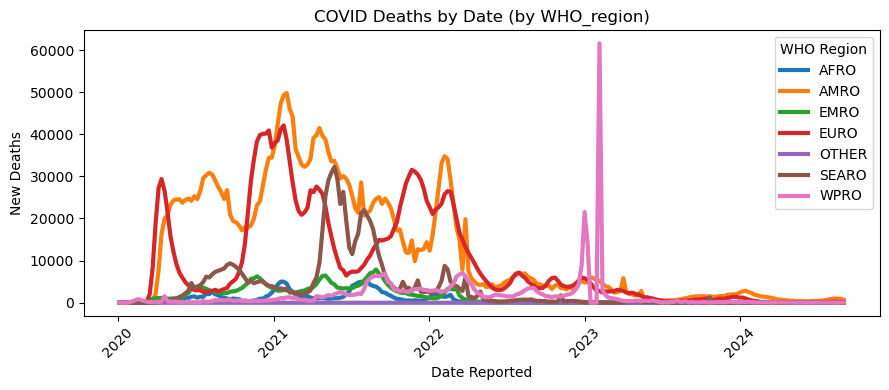

In [17]:
# Group data by Continent and plot each continent separately
regions = covid_clean2['WHO_region'].unique()
plt.figure(figsize=(9, 4))

for region in regions:
    region_data = covid_clean2[covid_clean2['WHO_region'] == region]
    plt.plot(region_data['Date_reported'], region_data['New_deaths'], label=region, linewidth=3, fillstyle='none')

# Adding title and labels
plt.title('COVID Deaths by Date (by WHO_region)')
plt.xlabel('Date Reported')
plt.ylabel('New Deaths')

# Adding legend
plt.legend(title='WHO Region')

# Show the plot with proper x-ticks formatting
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()       # Adjust layout to fit everything
plt.show()

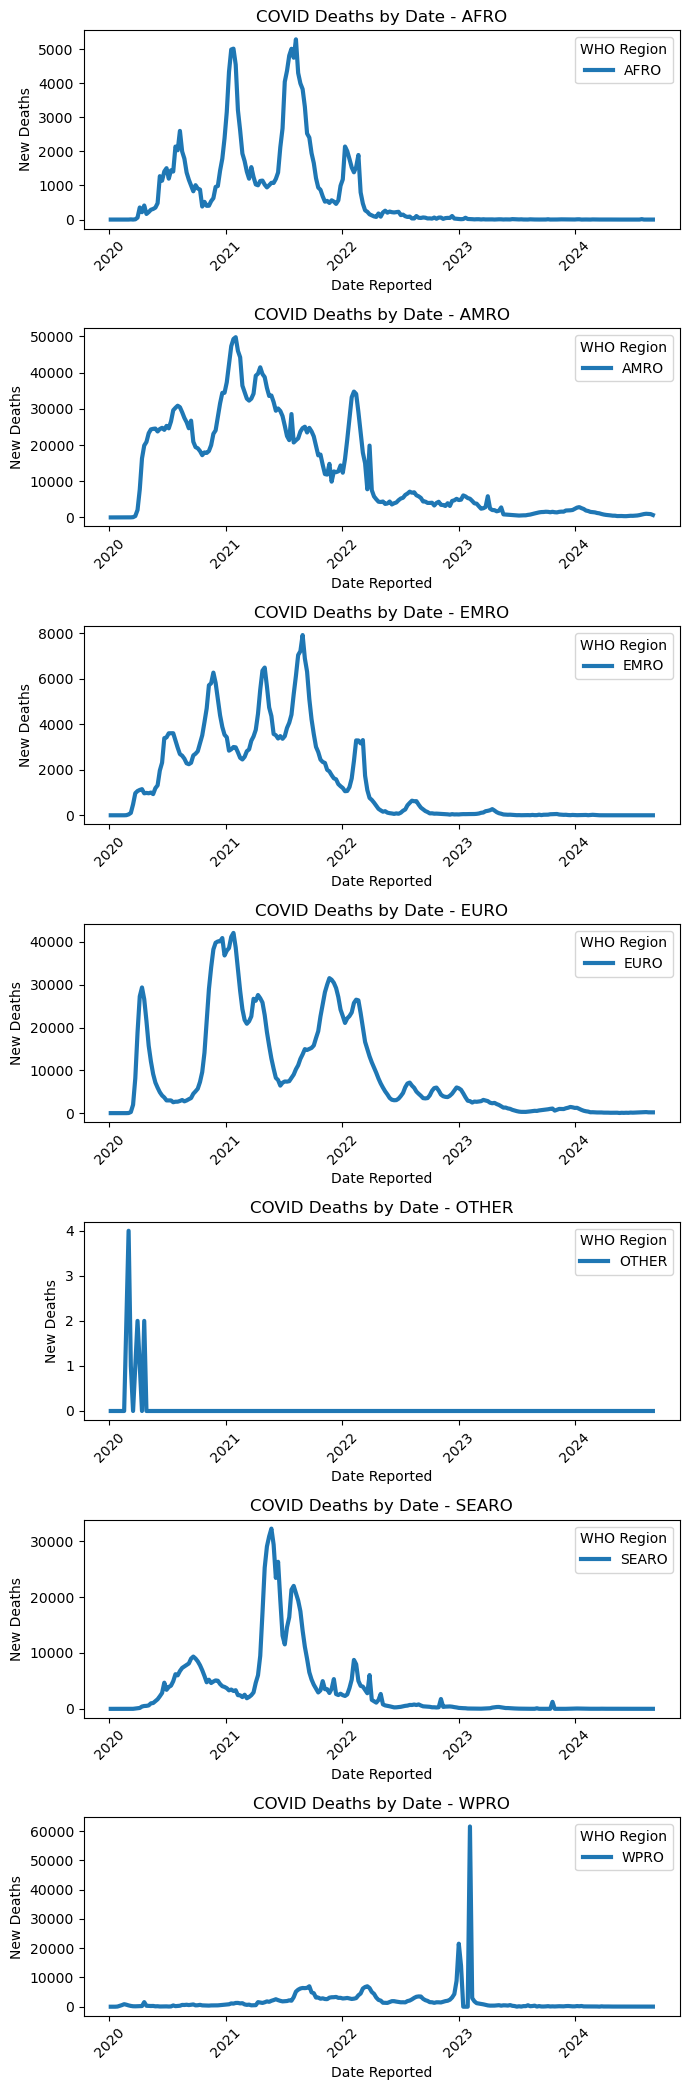

In [18]:
# Set up subplots: one plot for each continent
fig, axes = plt.subplots(len(regions), 1, figsize=(7, 3 * len(regions)))

# Ensure axes is always iterable (even for a single plot)
if len(regions) == 1:
    axes = [axes]

# Loop through each continent and plot in corresponding subplot
for i, region in enumerate(regions):
    region_data = covid_clean2[covid_clean2['WHO_region'] == region]
    axes[i].plot(region_data['Date_reported'], region_data['New_deaths'], label=region, linewidth=3)
    axes[i].set_title(f'COVID Deaths by Date - {region}')
    axes[i].set_xlabel('Date Reported')
    axes[i].set_ylabel('New Deaths')
    axes[i].legend(title='WHO Region')

# Rotate date labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()